In [1]:
import sys
import os
import urllib.request  
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Gromacs_py import
import gromacs_py
from gromacs_py import gmx
from gromacs_py.tools import monitor

from os_command_py import os_command

In [2]:
%matplotlib notebook

In [3]:
%cd /home/murail/Documents/Code/gromacs_py/docs/notebook/
%rm -r em_1y0m equi_HA_1y0m equi_CA_1y0m

/home/murail/Documents/Code/gromacs_py/docs/notebook
rm: cannot remove 'equi_CA_1y0m': No such file or directory


In [4]:
md_sys = gmx.GmxSys(name='1Y0M', coor_file='data_sim/sys_equi/sys_equi/01_equi_CA/equi_CA_1Y0M.gro')
md_sys.top_file = 'data_sim/sys_top/1Y0M_water_ion.top'

md_sys.display()


name         : 1Y0M
coor_file    : data_sim/sys_equi/sys_equi/01_equi_CA/equi_CA_1Y0M.gro
top_file     : data_sim/sys_top/1Y0M_water_ion.top
nt           : 0
ntmpi        : 0
sys_history  : 0


## Default `monitor` will show a progress bar

In [5]:
md_sys.em('em_1y0m', nsteps=4000, nstlog=10)

gmx grompp -f 1Y0M.mdp -c ../data_sim/sys_equi/sys_equi/01_equi_CA/equi_CA_1Y0M.gro -r ../data_sim/sys_equi/sys_equi/01_equi_CA/equi_CA_1Y0M.gro -p ../data_sim/sys_top/1Y0M_water_ion.top -po out_1Y0M.mdp -o 1Y0M.tpr -maxwarn 1
gmx mdrun -s 1Y0M.tpr -deffnm 1Y0M -nt 0 -ntmpi 0 -nsteps -2 -nocopyright


In [6]:
mdp_options = {'nsteps': 10000,
               'define': '-DPOSRES',
               'dt': 0.002,
               'nstlog': 1000}

equi_template_mdp = os.path.join(gmx.GROMACS_MOD_DIRNAME,
                                 "template/equi.mdp")

md_sys.run_md_sim(out_folder="equi_HA_1y0m",
                name="equi_HA_1y0m",
                pdb_restr=md_sys.coor_file, mdp_template=equi_template_mdp,
                mdp_options=mdp_options, maxwarn=1)

gmx grompp -f equi_HA_1y0m.mdp -c ../em_1y0m/1Y0M.gro -r ../em_1y0m/1Y0M.gro -p ../data_sim/sys_top/1Y0M_water_ion.top -po out_equi_HA_1y0m.mdp -o equi_HA_1y0m.tpr -maxwarn 1
gmx mdrun -s equi_HA_1y0m.tpr -deffnm equi_HA_1y0m -nt 0 -ntmpi 0 -nsteps -2 -nocopyright


- monitor bar can also be specified:

gmx grompp -f equi_CA_1y0m.mdp -c ../equi_HA_1y0m/equi_HA_1y0m.gro -r ../equi_HA_1y0m/equi_HA_1y0m.gro -p ../data_sim/sys_top/1Y0M_water_ion.top -po out_equi_CA_1y0m.mdp -o equi_CA_1y0m.tpr -maxwarn 1
gmx mdrun -s equi_CA_1y0m.tpr -deffnm equi_CA_1y0m -nt 0 -ntmpi 0 -nsteps -2 -nocopyright


<IPython.core.display.Javascript object>


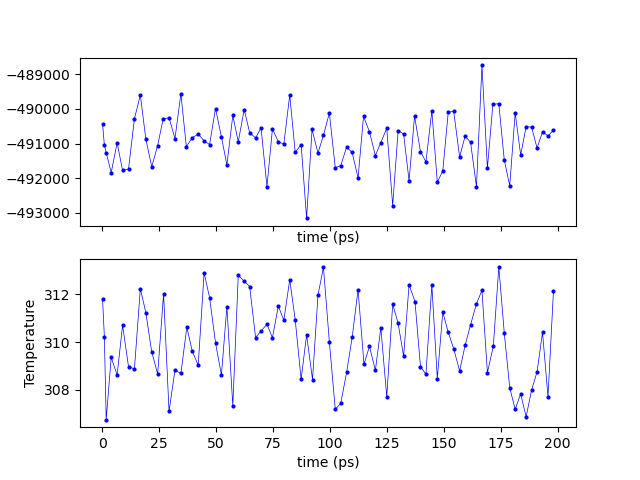

In [7]:
monitor = {'function': monitor.simulation_plot,
           'extract_func': [{'func': monitor.extract_log_dict,
                             'term': 'Potential'},
                           {'func': monitor.extract_log_dict,
                             'term': 'Temperature'}],
           'file_check_ext':'log'}

mdp_options = {'nsteps': 100000,
               'define': '-DPOSRES_CA',
               'dt': 0.002,
               'nstlog': 100}

equi_template_mdp = os.path.join(gmx.GROMACS_MOD_DIRNAME,
                                 "template/equi.mdp")

md_sys.run_md_sim(out_folder="equi_CA_1y0m",
                name="equi_CA_1y0m",
                pdb_restr=md_sys.coor_file, mdp_template=equi_template_mdp,
                mdp_options=mdp_options,
                monitor=monitor, maxwarn=1)

In [8]:
md_sys.display()


name         : 1Y0M
sim_name     : equi_CA_1y0m
coor_file    : equi_CA_1y0m/equi_CA_1y0m.gro
top_file     : data_sim/sys_top/1Y0M_water_ion.top
tpr          : equi_CA_1y0m/equi_CA_1y0m.tpr
mdp          : equi_CA_1y0m/equi_CA_1y0m.mdp
xtc          : equi_CA_1y0m/equi_CA_1y0m.xtc
edr          : equi_CA_1y0m/equi_CA_1y0m.edr
log          : equi_CA_1y0m/equi_CA_1y0m.log
nt           : 0
ntmpi        : 0
sys_history  : 3


## Testing progress bar, graph update, etc ...

In [3]:
#from tqdm import tqdm
from time import sleep

pbar = tqdm(total=100)
for i in range(10):
    sleep(0.1)
    pbar.update(10)
pbar.close()

100%|██████████| 100/100 [00:01<00:00, 98.20it/s]


In [4]:
with tqdm(total=100) as pbar:
    for i in range(10):
        sleep(0.1)
        pbar.update(10)

100%|██████████| 100/100 [00:01<00:00, 98.27it/s]


In [9]:
md_sys.display()

name         : 1Y0M
sim_name     : 1Y0M
coor_file    : tmp/1Y0M.gro
top_file     : data_sim/sys_top/1Y0M_water_ion.top
tpr          : tmp/1Y0M.tpr
mdp          : tmp/1Y0M.mdp
xtc          : tmp/1Y0M.trr
edr          : tmp/1Y0M.edr
log          : tmp/1Y0M.log
nt           : 0
ntmpi        : 0
sys_history  : 1


In [30]:
%cd /home/murail/Documents/Code/gromacs_py/docs/notebook/

/home/murail/Documents/Code/gromacs_py/docs/notebook


<IPython.core.display.Javascript object>


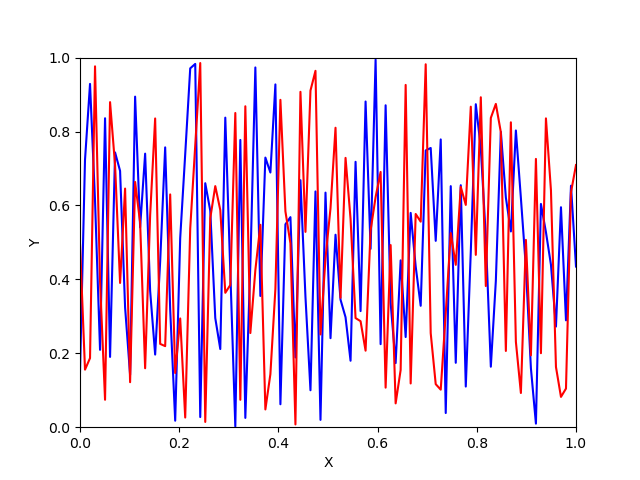

In [12]:
%matplotlib notebook

import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()



fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)



In [13]:
get_ipython().__class__.__name__

'ZMQInteractiveShell'

<IPython.core.display.Javascript object>


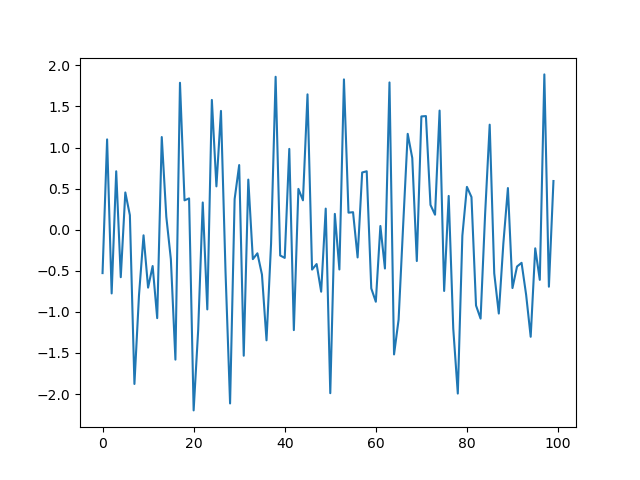

In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time 

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

plt.gcf()


for i in range(0,10):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()
    plt.pause(0.5)

<IPython.core.display.Javascript object>


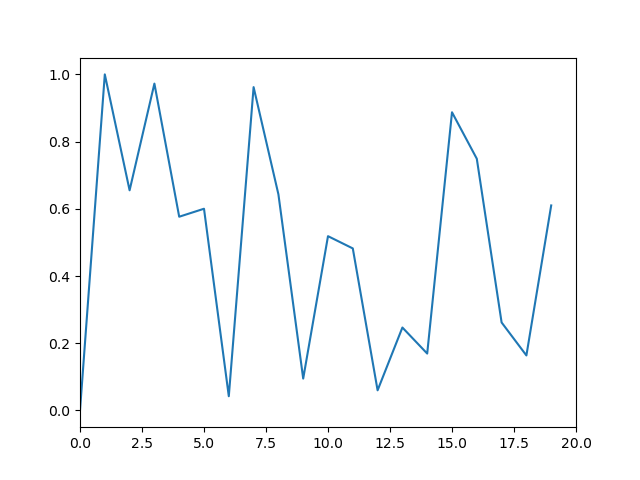

done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop


In [15]:
%matplotlib notebook
import pylab
import time
import random
import matplotlib.pyplot as plt

dat=[0,1]
fig = plt.figure()
ax = fig.add_subplot(111)
Ln, = ax.plot(dat)
ax.set_xlim([0,20])
plt.ion()
#plt.show()    
for i in range (18):
    dat.append(random.uniform(0,1))
    Ln.set_ydata(dat)
    Ln.set_xdata(range(len(dat)))
    time.sleep(1)

    print('done with loop')

In [17]:
from ipywidgets import IntProgress
from IPython.display import display
import time

max_count = 1000

f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar

count = 0
while count <= max_count:
    f.value += 10 # signal to increment the progress bar
    time.sleep(.1)
    count += 10

IntProgress(value=0, max=1000)

In [1]:
import time

from tqdm import tqdm

for i in tqdm(range(10)):
     time.sleep(0.1)

100%|██████████| 10/10 [00:01<00:00,  9.81it/s]


In [60]:
del tqdm

In [58]:
from tqdm.notebook import trange, tqdm

for i in trange(10):
    time.sleep(0.1)
